# what is Support Vector machine:

# Interview Questions:

# 1.What is Support Vector Machine (SVM) and how does it work?


# 2.What is the difference between SVM and logistic regression?


# 3.What are the advantages of using SVM?


# 4.Can you explain the concept of the margin in SVM?


# 5.How does SVM handle non-linearly separable data?


# 6.What is the role of the regularization parameter in SVM?


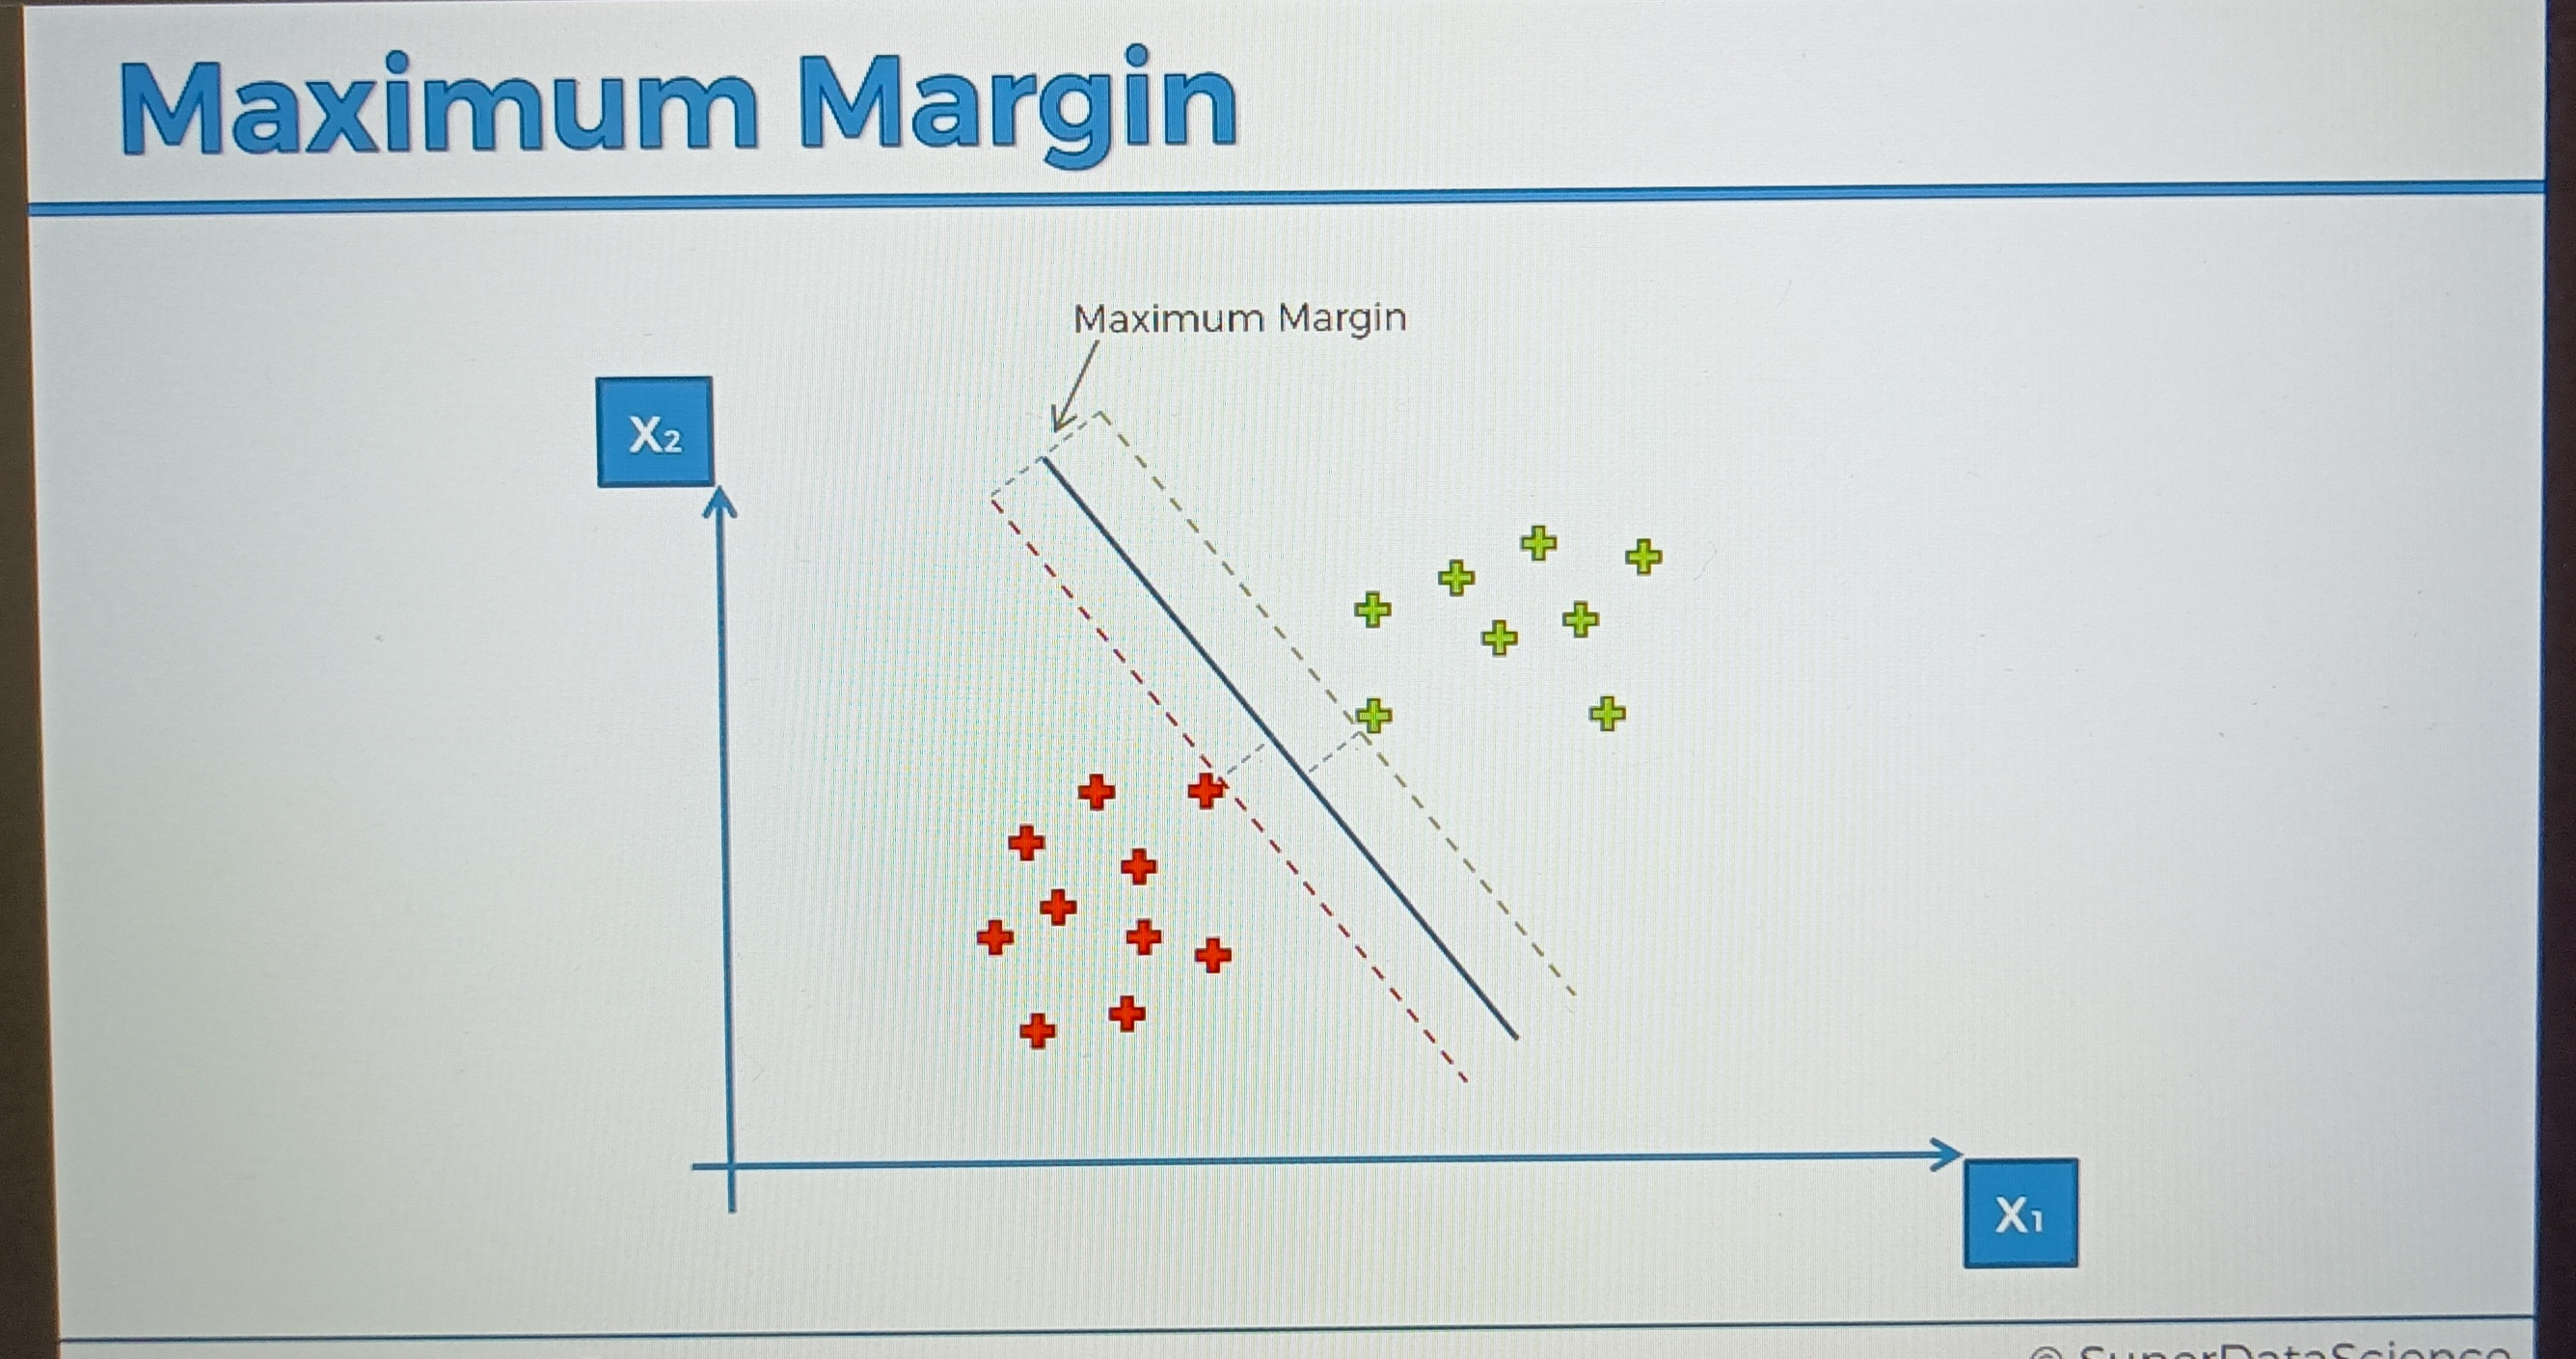

In [2]:
from IPython.display import Image
Image(filename = "C:/Users/thiru/Downloads/Maximum margin.jpg",width = 600,height = 600)

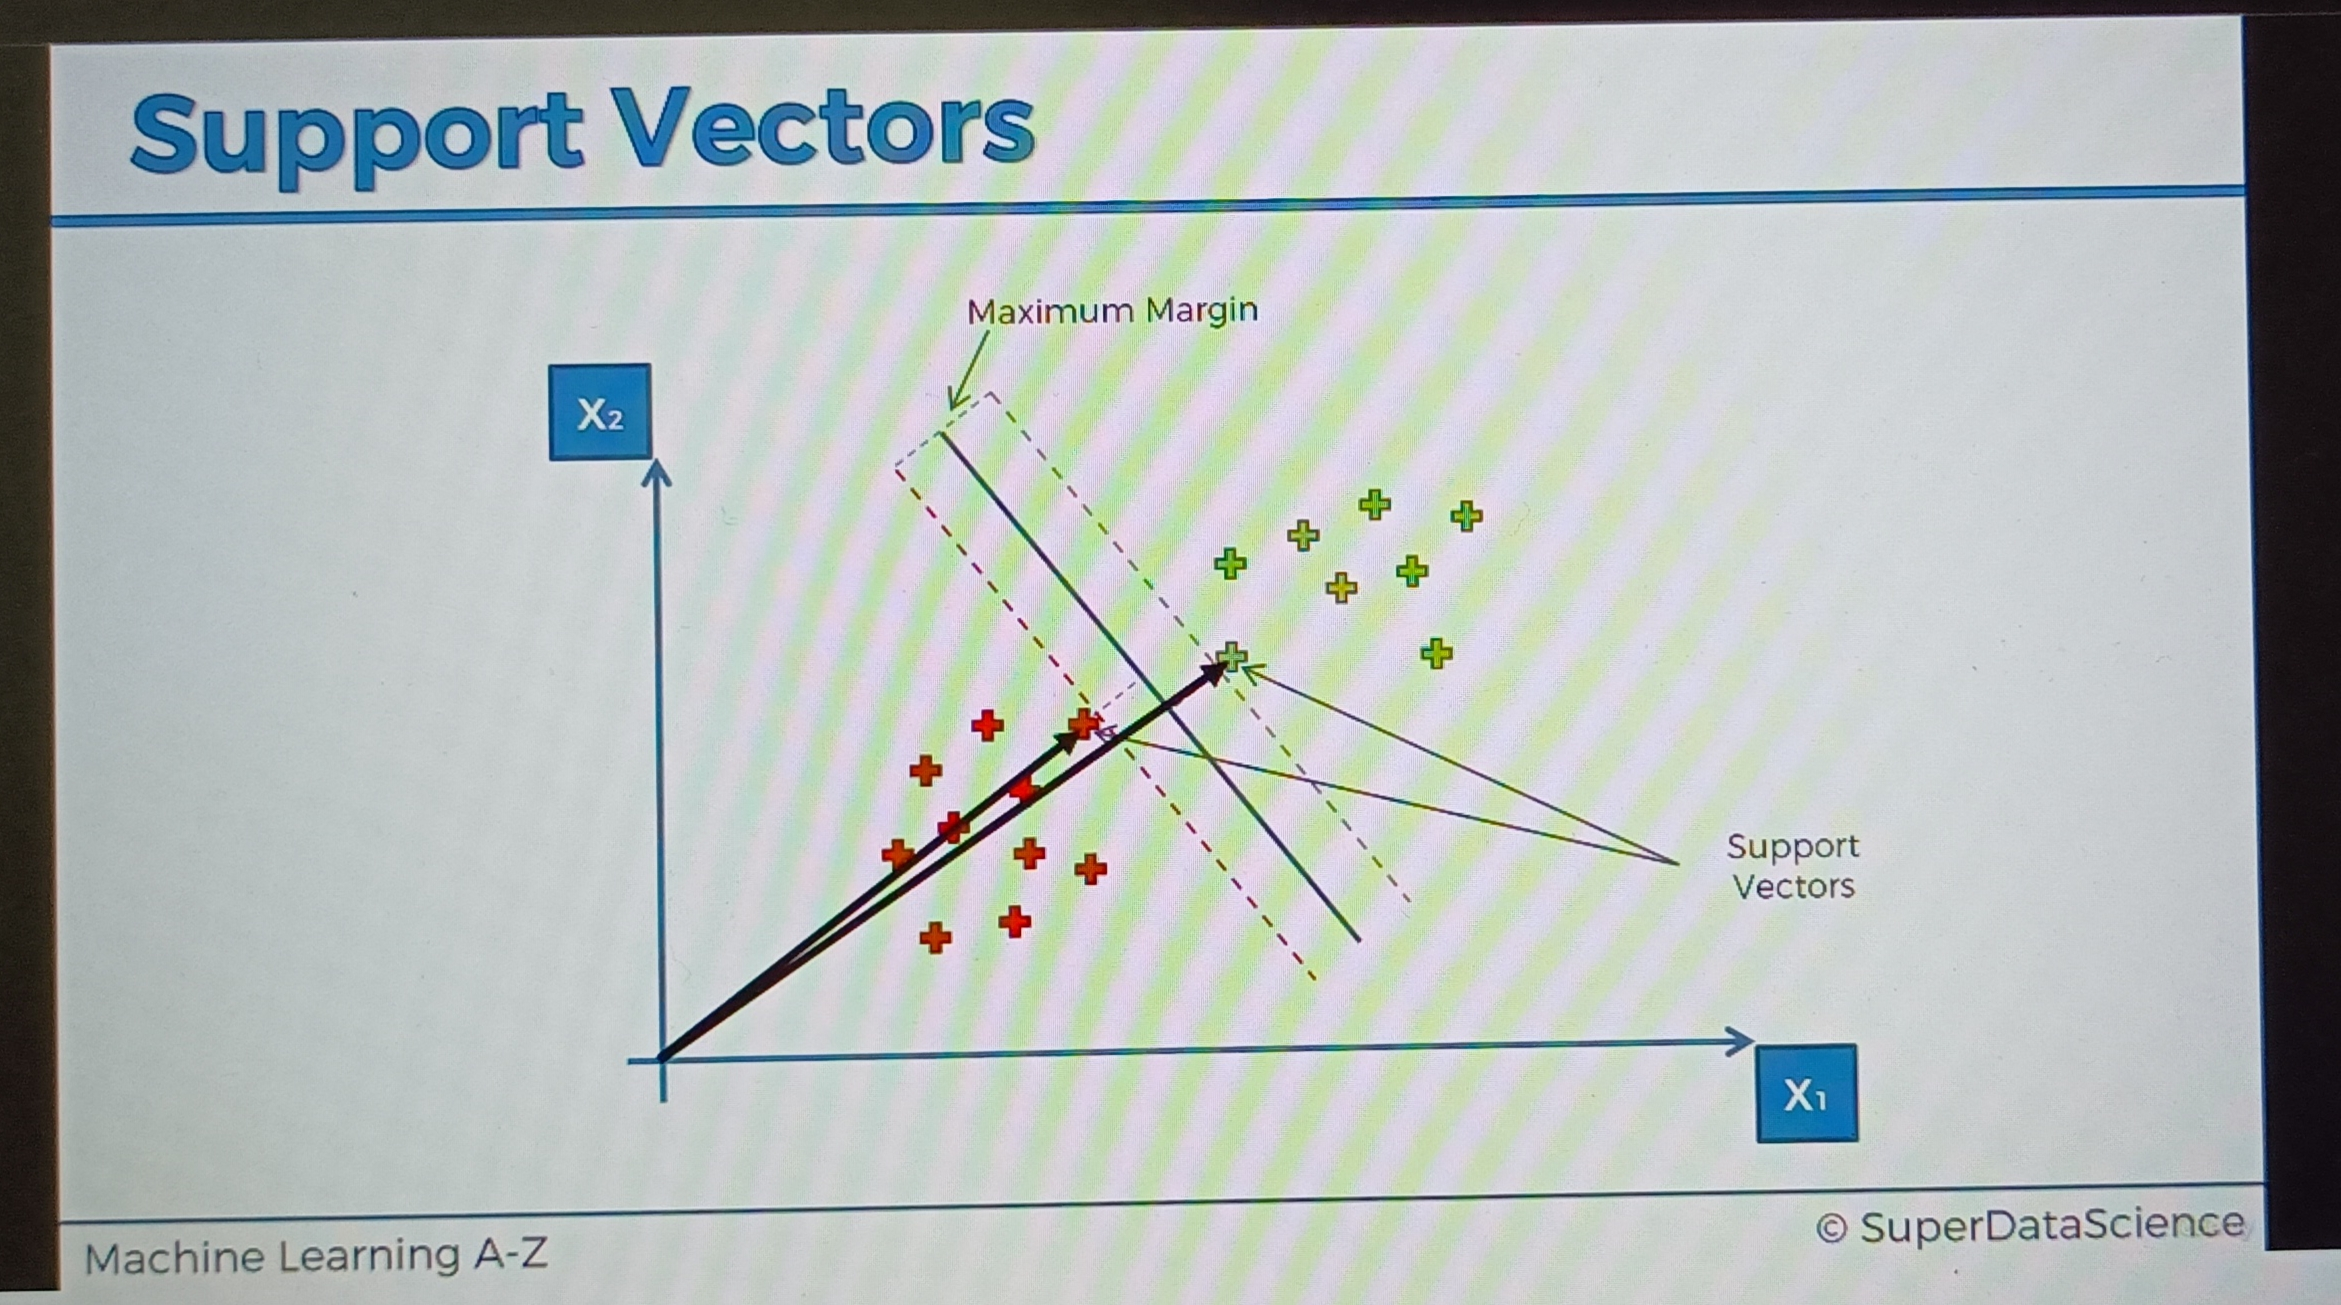

In [3]:
from IPython.display import Image
Image(filename = "C:/Users/thiru/Downloads/Support Vector.jpg",width = 600,height = 600)

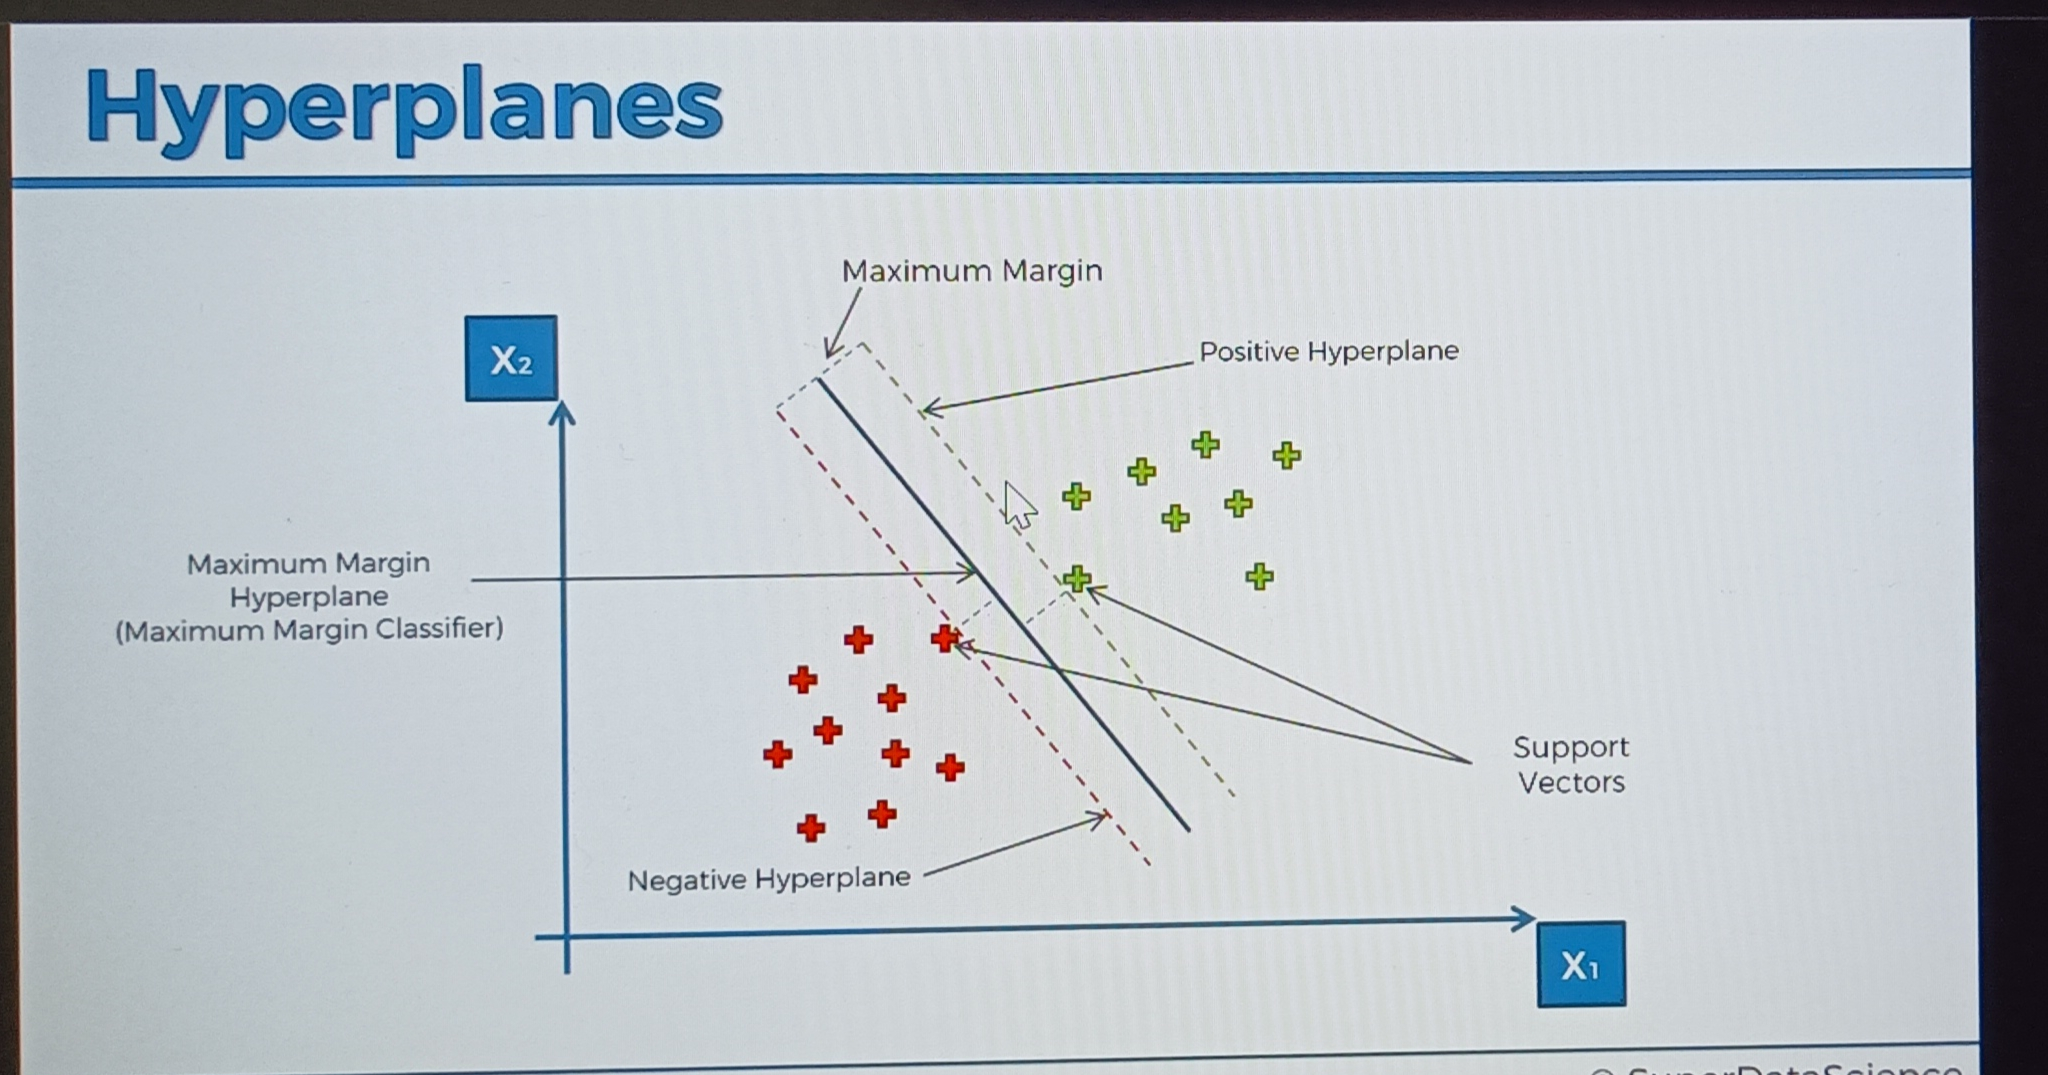

In [4]:
from IPython.display import Image
Image(filename = "C:/Users/thiru/Downloads/Hyperplanes.jpg",width = 600,height = 600)

# Import Required Libraries:

In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv("C:/data Science/Machine Learning-A-Z-Codes-Datasets/Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 16 - Support Vector Machine (SVM)/Python/Social_Network_Ads.csv")

In [24]:
data

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]

In [25]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

# Splitting the data into training and testing

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [27]:
print(X_train)

[[    58 144000]
 [    59  83000]
 [    24  55000]
 [    26  35000]
 [    58  38000]
 [    42  80000]
 [    40  75000]
 [    59 130000]
 [    46  41000]
 [    41  60000]
 [    42  64000]
 [    37 146000]
 [    23  48000]
 [    25  33000]
 [    24  84000]
 [    27  96000]
 [    23  63000]
 [    48  33000]
 [    48  90000]
 [    42 104000]
 [    44  39000]
 [    32 120000]
 [    38  50000]
 [    32 135000]
 [    52  21000]
 [    53 104000]
 [    39  42000]
 [    38  61000]
 [    36  50000]
 [    36  63000]
 [    35  25000]
 [    35  50000]
 [    42  73000]
 [    47  49000]
 [    59  29000]
 [    49  65000]
 [    45 131000]
 [    31  89000]
 [    46  82000]
 [    47  51000]
 [    26  15000]
 [    60 102000]
 [    38 112000]
 [    40 107000]
 [    42  53000]
 [    35  59000]
 [    48  41000]
 [    48 134000]
 [    38 113000]
 [    29 148000]
 [    26  15000]
 [    60  42000]
 [    24  19000]
 [    42 149000]
 [    46  96000]
 [    28  59000]
 [    39  96000]
 [    28  89000]
 [    41  7200

In [28]:
print(X_test)

[[    30  87000]
 [    38  50000]
 [    35  75000]
 [    30  79000]
 [    35  50000]
 [    27  20000]
 [    31  15000]
 [    36 144000]
 [    18  68000]
 [    47  43000]
 [    30  49000]
 [    28  55000]
 [    37  55000]
 [    39  77000]
 [    20  86000]
 [    32 117000]
 [    37  77000]
 [    19  85000]
 [    55 130000]
 [    35  22000]
 [    35  47000]
 [    47 144000]
 [    41  51000]
 [    47 105000]
 [    23  28000]
 [    49 141000]
 [    28  87000]
 [    29  80000]
 [    37  62000]
 [    32  86000]
 [    21  88000]
 [    37  79000]
 [    57  60000]
 [    37  53000]
 [    24  58000]
 [    18  52000]
 [    22  81000]
 [    34  43000]
 [    31  34000]
 [    49  36000]
 [    27  88000]
 [    41  52000]
 [    27  84000]
 [    35  20000]
 [    43 112000]
 [    27  58000]
 [    37  80000]
 [    52  90000]
 [    26  30000]
 [    49  86000]
 [    57 122000]
 [    34  25000]
 [    35  57000]
 [    34 115000]
 [    59  88000]
 [    45  32000]
 [    29  83000]
 [    26  80000]
 [    49  2800

In [29]:
print(y_train)

[1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1
 0 0 1 0 1 0 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 1 1 0 0 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 1 0
 0 0 1 0 1 1 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1
 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1
 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0]


In [30]:
print(y_test)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]


# Feature scaling:

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [32]:
print(X_train)

[[ 1.92295008e+00  2.14601566e+00]
 [ 2.02016082e+00  3.78719297e-01]
 [-1.38221530e+00 -4.32498705e-01]
 [-1.18779381e+00 -1.01194013e+00]
 [ 1.92295008e+00 -9.25023920e-01]
 [ 3.67578135e-01  2.91803083e-01]
 [ 1.73156642e-01  1.46942725e-01]
 [ 2.02016082e+00  1.74040666e+00]
 [ 7.56421121e-01 -8.38107706e-01]
 [ 2.70367388e-01 -2.87638347e-01]
 [ 3.67578135e-01 -1.71750061e-01]
 [-1.18475597e-01  2.20395980e+00]
 [-1.47942605e+00 -6.35303205e-01]
 [-1.28500455e+00 -1.06988428e+00]
 [-1.38221530e+00  4.07691369e-01]
 [-1.09058306e+00  7.55356227e-01]
 [-1.47942605e+00 -2.00722133e-01]
 [ 9.50842613e-01 -1.06988428e+00]
 [ 9.50842613e-01  5.81523798e-01]
 [ 3.67578135e-01  9.87132798e-01]
 [ 5.61999628e-01 -8.96051849e-01]
 [-6.04529329e-01  1.45068594e+00]
 [-2.12648508e-02 -5.77359062e-01]
 [-6.04529329e-01  1.88526701e+00]
 [ 1.33968560e+00 -1.41754914e+00]
 [ 1.43689635e+00  9.87132798e-01]
 [ 7.59458956e-02 -8.09135634e-01]
 [-2.12648508e-02 -2.58666276e-01]
 [-2.15686344e-01 -5

In [33]:
print(X_test)

[[-7.98950822e-01  4.94607583e-01]
 [-2.12648508e-02 -5.77359062e-01]
 [-3.12897090e-01  1.46942725e-01]
 [-7.98950822e-01  2.62831011e-01]
 [-3.12897090e-01 -5.77359062e-01]
 [-1.09058306e+00 -1.44652121e+00]
 [-7.01740076e-01 -1.59138156e+00]
 [-2.15686344e-01  2.14601566e+00]
 [-1.96547978e+00 -5.58617754e-02]
 [ 8.53631867e-01 -7.80163563e-01]
 [-7.98950822e-01 -6.06331134e-01]
 [-9.93372315e-01 -4.32498705e-01]
 [-1.18475597e-01 -4.32498705e-01]
 [ 7.59458956e-02  2.04886868e-01]
 [-1.77105829e+00  4.65635512e-01]
 [-6.04529329e-01  1.36376973e+00]
 [-1.18475597e-01  2.04886868e-01]
 [-1.86826903e+00  4.36663440e-01]
 [ 1.63131784e+00  1.74040666e+00]
 [-3.12897090e-01 -1.38857706e+00]
 [-3.12897090e-01 -6.64275277e-01]
 [ 8.53631867e-01  2.14601566e+00]
 [ 2.70367388e-01 -5.48386991e-01]
 [ 8.53631867e-01  1.01610487e+00]
 [-1.47942605e+00 -1.21474464e+00]
 [ 1.04805336e+00  2.05909944e+00]
 [-9.93372315e-01  4.94607583e-01]
 [-8.96161568e-01  2.91803083e-01]
 [-1.18475597e-01 -2

# training the Support vector machine on training set

In [34]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear',random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

# predict the test result:

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [1 1]
 [1 1]]


# predict new result:

In [37]:
print(classifier.predict(sc.transform([[30,87000]])))

[0]


# Making Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[57  1]
 [ 6 16]]


In [39]:
accuracy_score(y_test,y_pred)

0.9125

# visualisation of Training set:

In [40]:
from matplotlib.colors import ListedColormap

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


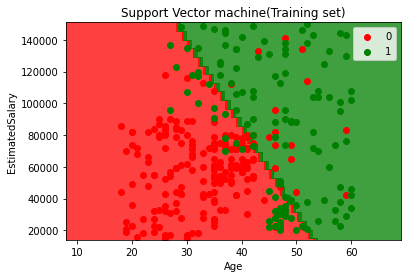

In [41]:
x_set,y_set = sc.inverse_transform(X_train),y_train
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-10, stop = x_set[:,0].max()+10,step = 1),
                   np.arange(start = x_set[:,1].min()-1000, stop = x_set[:,1].max()+1000,step = 1))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('Support Vector machine(Training set)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()


# visualisation of Test set:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


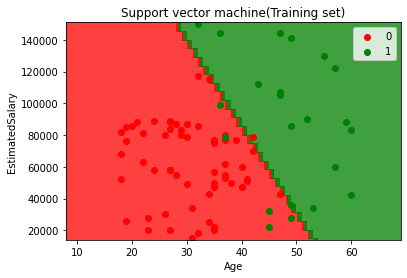

In [42]:
x_set,y_set = sc.inverse_transform(X_test),y_test
X1,X2 = np.meshgrid(np.arange(start = x_set[:,0].min()-10, stop = x_set[:,0].max()+10,step = 1),
                   np.arange(start = x_set[:,1].min()-1000, stop = x_set[:,1].max()+1000,step = 1))
plt.contourf(X1,X2,classifier.predict(sc.transform(np.array([X1.ravel(),X2.ravel()]).T)).reshape(X1.shape),
        alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j,0],x_set[y_set == j,1],c = ListedColormap(('red','green'))(i),label = j)
plt.title('Support vector machine(Training set)')
plt.xlabel('Age')
plt.ylabel('EstimatedSalary')
plt.legend()
plt.show()
